# Bikes Data Exploration
## by Michael Mwangi Ndirangu

## Introduction

The dataset used for analysis is the Ford GoBike System Data: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset contains information with regards to 183,412 observations with regards to 16 variables related to the bike share. Variables include; Bike duration in seconds, member_birth_year, member_gender, user type, and whether the bike share was used for the duration of the whole trip. The dataset can be found in udacity repository here; https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(bikes.shape)
print(bikes.dtypes)
print(bikes.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

> The dataset contains information with regards to 183,412 observations with regards to 16 different features. Features of interest include; Bike duration in seconds, member_birth_year, member_gender, user type, and whether the bike share was used for the duration of the whole trip. One more feature (member_age) was obatined based on the birth year. Age and duration in seconds are integers while user_type, member_gender, and bike_share_for_all_trip are binary caegorical variables.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in the bike share duration in seconds. I am interested in determining what feautures can predict the duration of bike rides

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> My expectation is that member age, user_type, member_gender, and bike_share_for_all_trip all can be used to predict the duration of bike usage. Speciffically I expect the duration to generally decrease with age, and to be different based on the other three categorical variables. 

### Feature Engineering

In [5]:
bikes['member_age'] =2022 -bikes['member_birth_year']
bikes['member_age'] =bikes['member_age'].astype(pd.Int64Dtype())
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Tidy Dataset

In [6]:
### Tidy Dataset: Remove null values
bikes = bikes[bikes['member_age'].notnull()] #remove null values
bikes = bikes[bikes['member_gender']!="Other"] # remove other gender

In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171495 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             171495 non-null  int64  
 1   start_time               171495 non-null  object 
 2   end_time                 171495 non-null  object 
 3   start_station_id         171305 non-null  float64
 4   start_station_name       171305 non-null  object 
 5   start_station_latitude   171495 non-null  float64
 6   start_station_longitude  171495 non-null  float64
 7   end_station_id           171305 non-null  float64
 8   end_station_name         171305 non-null  object 
 9   end_station_latitude     171495 non-null  float64
 10  end_station_longitude    171495 non-null  float64
 11  bike_id                  171495 non-null  int64  
 12  user_type                171495 non-null  object 
 13  member_birth_year        171495 non-null  float64
 14  memb

## Univariate Exploration

#### Distribution of Duration in Seconds

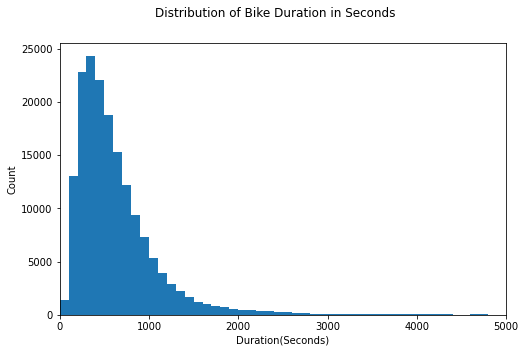

In [42]:
#Histogram plot for duration
binsize = 100
bins = np.arange(0, bikes['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'duration_sec', bins=bins)
plt.xlabel('Duration(Seconds)')
plt.ylabel('Count')
plt.xlim([0,5000])
plt.suptitle('Distribution of Bike Duration in Seconds')
plt.show()

#### Distribution of Age


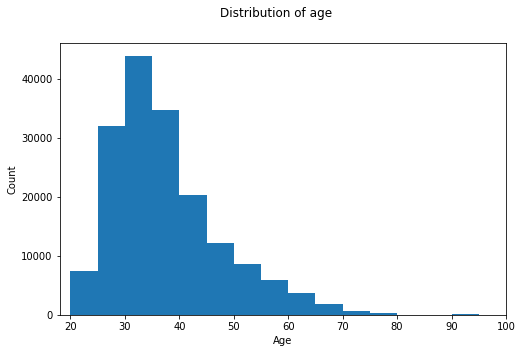

In [9]:
#Histogram plot for age
binsize = 5
bins = np.arange(0, bikes['member_age'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'member_age', bins=bins)
plt.suptitle('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim([18,100])
plt.show()

#### Distribution of Gender

In [10]:
def pie_chart(col):
    """
    Takes in a categorical column in a dataset and produces ist resulting pie chart
    
    Parameters:
    col (str): The categorical column of interest
  
    Returns:
    A pie chart of the column
    """
    sorted_counts = bikes[col].value_counts()
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
    plt.axis('square')
    plt.suptitle('Distribution of {}'.format(col))
    plt.show

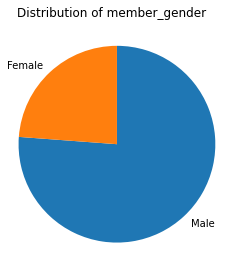

In [11]:
pie_chart('member_gender')

#### Distribution of user type

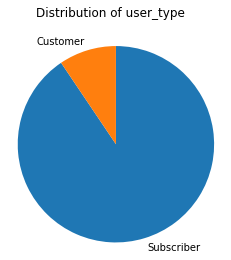

In [12]:
pie_chart('user_type')

#### Distribution of bike_share_for_all_trip 

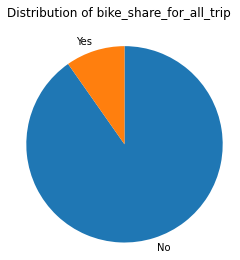

In [13]:
pie_chart('bike_share_for_all_trip')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For duration in seconds, the distribution is highly skewed to the right as there is a long tail to the right. This indicates that there are a few individuals whose bike utilization is much longer than that of the majority. No unsuual points as all points are within 24 hours.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Data was tidied up to remove all that indicated gender as other. Feature engineering was also done to generate age variable based on member birth year. There were no unussual distributions. 
- For age variable, the distribution was positively skewed indicating that majority of users are young with a minority being elderly. 
- In terms of gender, it appears males utilize the bike share service more than their female counterparts
- For user_type; majority of users are subscribers with only a minority being regular customers.
- For distribution of bike share for all trip, majority do not use the bike for the entire trip with only a minority doing so.

## Bivariate Exploration

#### Relationship between Duration in seconds and Age

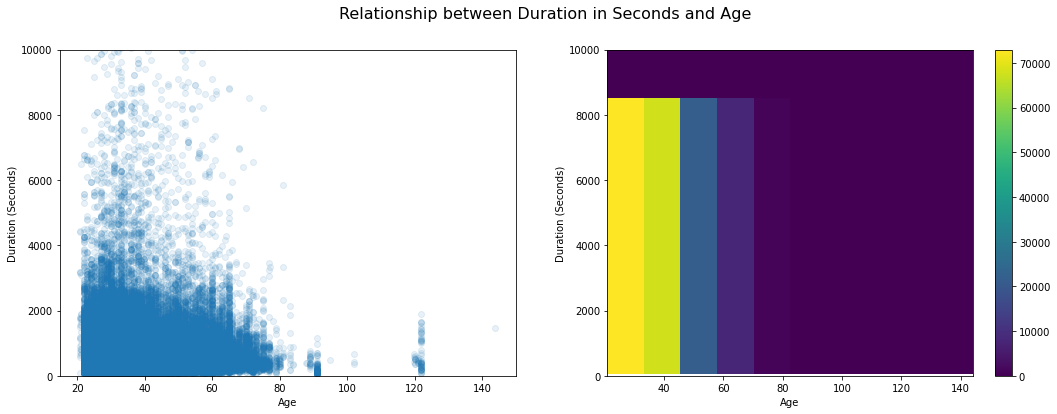

In [14]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = bikes, x = 'member_age', y = 'duration_sec', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Age')
plt.ylabel('Duration (Seconds)')
plt.ylim([0,10000])
plt.suptitle('Relationship between Duration in Seconds and Age',fontsize=16,fontdict={"weight": "bold"});

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = bikes, x = 'member_age', y = 'duration_sec')
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Duration (Seconds)')
plt.ylim([0,10000]);

#### Relationship between Duration in Seconds and Gender

In [15]:
def box_violin_point(col):
    """
    Takes in a categorical column in a dataset and produces its resulting violin, boxplot and
    pointplot with the duration of seconds column
    
    Parameters:
    col (str): The categorical column of interest
  
    Returns:
    Violin, boxplot and pointplot
    """
    # Three PLOTS IN ONE FIGURE
    plt.figure(figsize = [20, 5])
    base_color = sb.color_palette()[0]
    plt.suptitle('Relationship between Duration in Seconds and {}'.format(col),fontsize=16,fontdict={"weight": "bold"});

    # LEFT plot: violin plot
    plt.subplot(1, 3, 1)
    #Let's return the axes object
    ax1 = sb.violinplot(data = bikes, x = col, y = 'duration_sec', color=base_color)
    plt.xticks(rotation=15)
    plt.ylim([0,3000]);

    # Center plot: box plot
    plt.subplot(1, 3, 2)
    sb.boxplot(data = bikes, x = col, y = 'duration_sec', color=base_color)
    plt.xticks(rotation=15);
    plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

    plt.subplot(1, 3, 3)
    sb.pointplot(data=bikes, x = col, y = 'duration_sec', color=base_color, ci='sd', linestyles="")
    plt.xticks(rotation=15);
    plt.ylabel('Avg. Duration in Seconds')

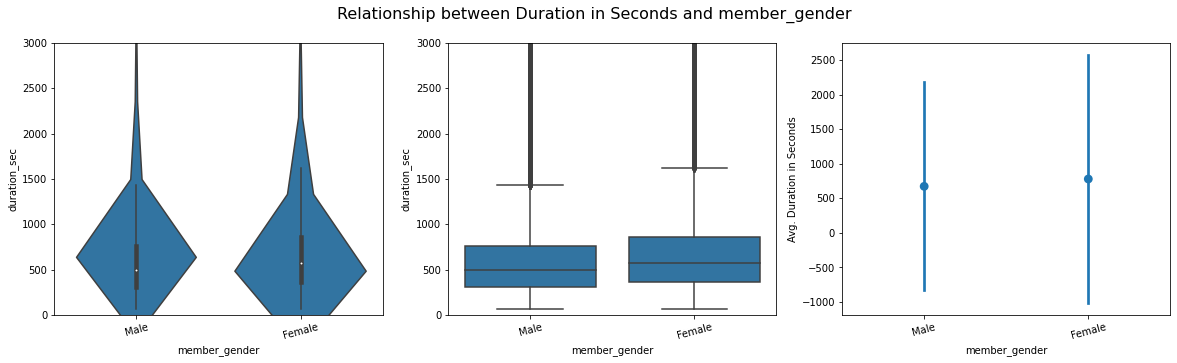

In [16]:
box_violin_point('member_gender')

#### Relationship between Duration in Seconds and User_type

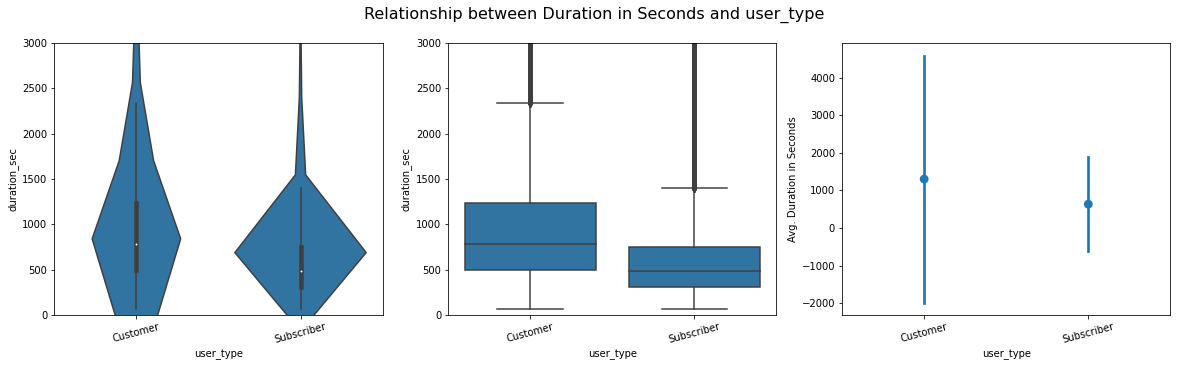

In [17]:
box_violin_point('user_type')

#### Relationship between Duration in Seconds and Bike_share_for_all_trip

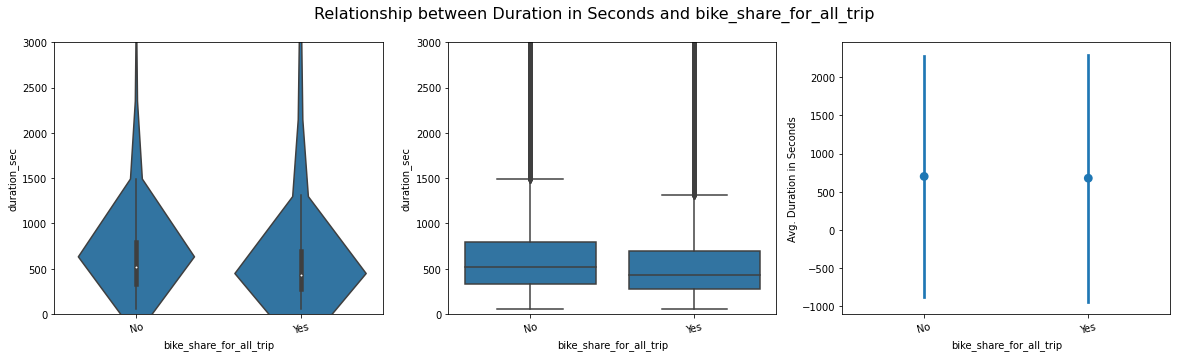

In [18]:
box_violin_point('bike_share_for_all_trip')

#### Relationship between Gender and User_type

<AxesSubplot:xlabel='member_gender'>

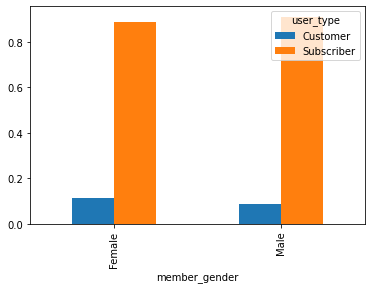

In [38]:
CrosstabResult=pd.crosstab(index=bikes['member_gender'],columns=bikes['user_type'],normalize=0)
CrosstabResult.plot.bar()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship between age and duration in seconds was investigated by using a scatterplot and heat map. Analysis showed that there is a somewhat negative relationship between age and duration. The duration of younger people is somewhat higher for younger geneartion and decreases with increase with age.
> Relationships between duration and the variables; user_type, gender, and bike_share_for_all_trip were also investigated. This was done by use of violinplot,boxplot, and point plot. Based on the plots, there did not appear to be any clear differences between duration by gender and bike_share_for_all_trip. However, there were clear differences in duration based on user_type. Customers generally have higher durations than subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Analysis was done to evaluate whether any significant relationship exists between user_type and gender. Analysis showed that user_type is not dependt on gender as there are similar proportions of customers and subscribers for both males and females.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Relationship between  Age and Duration by Gender

In [30]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    bin_centers = (bins[1:] + bins[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

def poly_plot(hue_col):
    """
    Takes in a categorical column in a dataset and produces its resulting mean lineplot with age and average duration columns
    Parameters:
    col (str): The categorical column of interest to form the x axis
  
    Returns:
    mean lineplot of average duration by x_col differentiated by the usertype
    """
    
    bin_edges = np.arange(5, bikes['member_age'].max()+5, 5)
    g = sb.FacetGrid(data = bikes, hue = hue_col, height = 5).set(title='Relationship between Age and Duration by {}'.format(hue_col))
    g.map(mean_poly, 'member_age', 'duration_sec', bins = bin_edges)
    g.set_ylabels('mean(duration_sec)')
    g.add_legend()

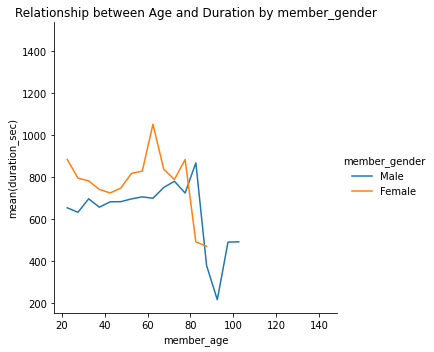

In [31]:
poly_plot('member_gender')

#### Relationship between  Age and Duration by User type

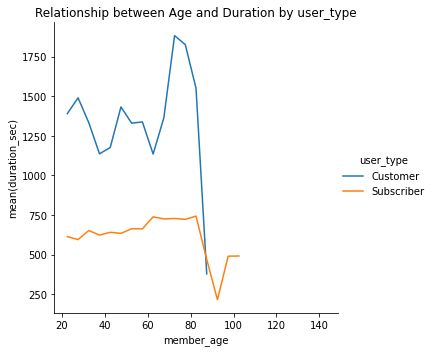

In [32]:
poly_plot('user_type')

#### Relationship between  Age and Duration by Bike_share_for_all_trip

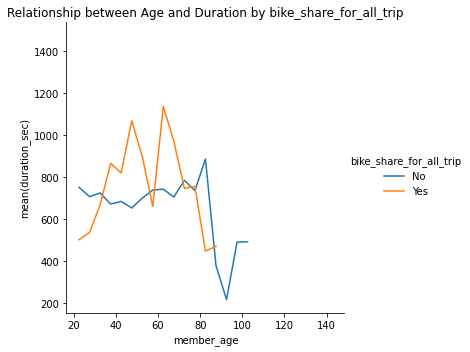

In [33]:
poly_plot('bike_share_for_all_trip')

#### Relationship between user_type and Duration by Gender

In [34]:
def user_plt(x_col):
    """
    Takes in a categorical column in a dataset and produces its resulting mean pointplot with usertype and average duration columns
    Parameters:
    col (str): The categorical column of interest to form the x axis
  
    Returns:
    pointplot of average duration by x_col differentiated by the usertype
    """
    sb.pointplot(data=bikes, x = x_col, y = 'duration_sec', hue="user_type", dodge = 0.3, ci='sd', linestyles="")
    plt.xticks(rotation=15);
    plt.ylabel('Avg. Duration in Seconds')
    plt.suptitle('Relationship between User_type and Duration by {}'.format(x_col),fontsize=16,fontdict={"weight": "bold"});

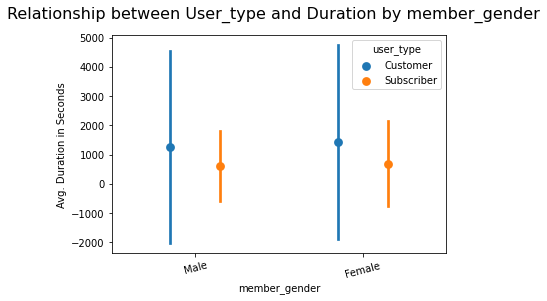

In [35]:
user_plt('member_gender')

#### Relationship between user_type and Duration by Bike_share_for_all_trip

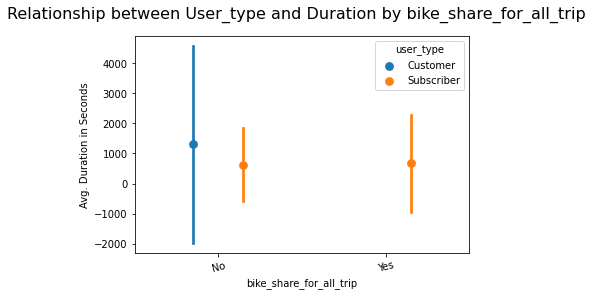

In [36]:
user_plt('bike_share_for_all_trip')

#### Relationship between Bike_share_for_all_trip and Duration by Gender

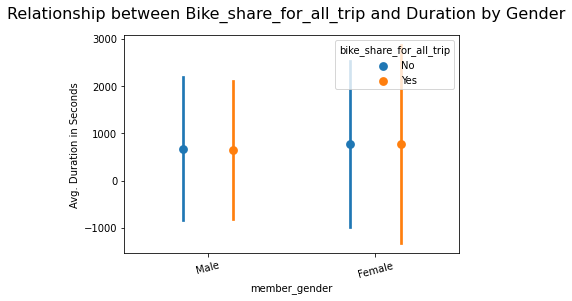

In [37]:
#point plot of relationship between average duration and member gender differentioated by bike share for all trip variable. 
sb.pointplot(data=bikes, x = 'member_gender', y = 'duration_sec', hue="bike_share_for_all_trip", dodge = 0.3, ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg. Duration in Seconds')
plt.suptitle('Relationship between Bike_share_for_all_trip and Duration by Gender',fontsize=16,fontdict={"weight": "bold"});

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Initial bivariate analysis showed that gender does not impact on duration in seconds. However, by adding the age variable, then gender becomes a predictor of duration in seconds. For individuals aged below 80, then females have higher durations than males. However, for individuls aged above 80, then males generally have higher duration than females.
> In terms of the relationship between duration and bike_share_for_all_trip,bivariate analysis showed no clear relationship. The relationship remains the same even when the age variable is included. The difference in duration overlaps between the different ages and no general differences in duration can be observed.
> In terms of user type, the relationship remains the same regardless of age, gender or bike_share_for_all_trip. The relationship is that regardless of the added variables, customers generally have higher duration than subscribers. In other words, regardless of age, gender,or whether the bike share is for the whole trip, a customer will generally have a higher duration than a subscriber. 

### Were there any interesting or surprising interactions between features?

> It was suprising that a relationship exists between gender and duration when age is added as a factor.

## Conclusions
> The main observable findings is that for the variable duration, the distribution is highly skewed to the right. This indicates that, there are individuals that use the bikes for relatively much longer times than other individuals. No observable relationship exists between duration and bike_share_for all_trip. In terms of age and duration there is a somewhat negative relationship where duration gradually decreases with increase in age. Younger people ride for more hours than the elderly. In terms of relationship between gender and duration, there is generally no clear relationship. However, the relationship exists when the age variable is added. For individuals aged below 80, then females have higher durations than males. However, for individuls aged above 80, then males generally have higher duration than females.  The most clear relationshiop or variable that can be a significant predictor of duartion is user_type. For user_type customers generally have higher duration times than subscribers regardless of gender, age, or whether bike share for the whole trip or not.
